# Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [2]:
df=pd.read_csv('Heart attack.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333,1
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667,1
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667,1
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000,1
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667,1


In [4]:
df.shape

(9722, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9722 non-null   float64
 1   age                9722 non-null   float64
 2   hypertension       9722 non-null   float64
 3   heart_disease      9722 non-null   float64
 4   ever_married       9722 non-null   float64
 5   work_type          9722 non-null   float64
 6   Residence_type     9722 non-null   float64
 7   avg_glucose_level  9722 non-null   float64
 8   bmi                9722 non-null   float64
 9   smoking_status     9722 non-null   float64
 10  stroke             9722 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 835.6 KB


In [6]:
df.isnull().sum().sort_values(ascending = False).head(5)

gender           0
age              0
hypertension     0
heart_disease    0
ever_married     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()
X = my_scaler.fit_transform(X)

# Spliting Data 
### train test split

In [10]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.20, random_state=100, stratify=y)

In [11]:
X_train.shape ,y_train.shape

((7777, 10), (7777,))

In [12]:
X_test.shape ,y_test.shape

((1945, 10), (1945,))

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
DTModel = DecisionTreeClassifier(criterion='entropy') #'log_loss', 'entropy', 'gini'
DTModel.fit(X_train,y_train)
print('DTModel Train Score is : ',DTModel.score(X_train,y_train))
print('DTModel Test Score is : ',DTModel.score(X_test,y_test))

DTModel Train Score is :  1.0
DTModel Test Score is :  0.9017994858611825


In [14]:
y_pred=NBModel.predict(X_test)

In [20]:
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [0, 0, 1, 1, 1]
predict output :  [0, 0, 1, 1, 1]


In [22]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[863, 110],
       [ 83, 889]], dtype=int64)

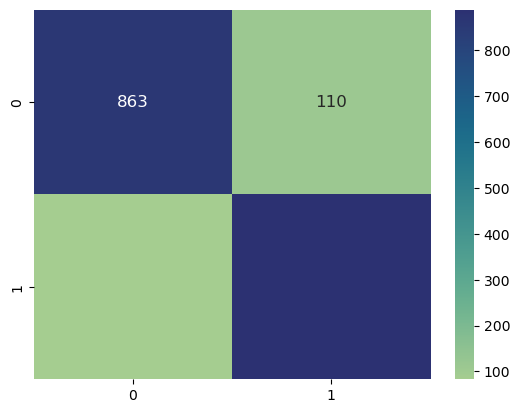

In [31]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       973
           1       0.89      0.91      0.90       972

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945



# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=20,criterion='entropy',max_depth=50)
RFModel.fit(X_train,y_train)
print('DTModel Train Score is : ',RFModel.score(X_train,y_train))
print('DTModel Test Score is : ',RFModel.score(X_test,y_test))

DTModel Train Score is :  0.9994856628519995
DTModel Test Score is :  0.9552699228791773


In [62]:
y_pred=RFModel.predict(X_test)

In [63]:
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [0, 0, 1, 1, 1]
predict output :  [0, 0, 1, 1, 1]


In [64]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[924,  49],
       [ 38, 934]], dtype=int64)

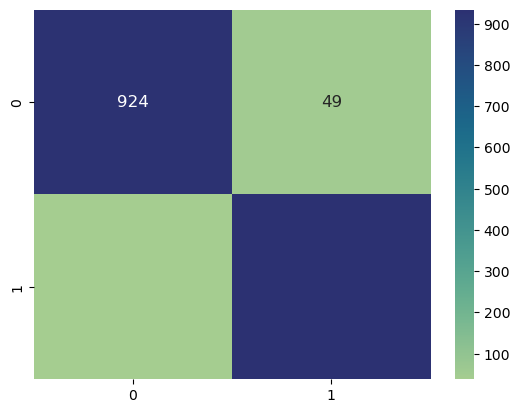

In [65]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       973
           1       0.89      0.91      0.90       972

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945

